### Esercitazione 20 - FI (Force Index)
#### Argomenti

* indicatore FI
* implementazione di grafici custom per rappresentare l'FI

L'indice di forza è un indicatore tecnico che misura la quantità di "forza" utilizzata per spostare il prezzo di
uno strumento finanziario.
L'indice di forza utilizza il prezzo e il volume per determinare la quantità di forza dietro un movimento di
un prezzo. L'indice è un oscillatore, che varia tra numeri positivi e negativi. È illimitato, il che significa che
l'indice può salire o scendere indefinitamente.
Viene utilizzato per la conferma di trend e breakout, nonché per individuare potenziali punti di svolta alla ricerca
di divergenze.

E' calcolato come segue:

Force Index = (prezzo di chiusura attuale - prezzo di chiusura precedente) * volume     
Force Index(n) = EMA di Force Index su n periodi (n=13 default)

In [1]:
import MetaTrader5 as mt5
import pandas as pd
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
connected = mt5.initialize(login=5798528, server="ActivTrades-Server", password='QFPHrdgg')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_D1, 0, 90))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

In [3]:
# utilizziamo Ta-Lib per il calcolo del FI

candles['fi'] = (candles['close'] - candles['close'].shift(1)) * candles['tick_volume']
candles['fi_ema'] = talib.EMA(candles['fi'], timeperiod=13)

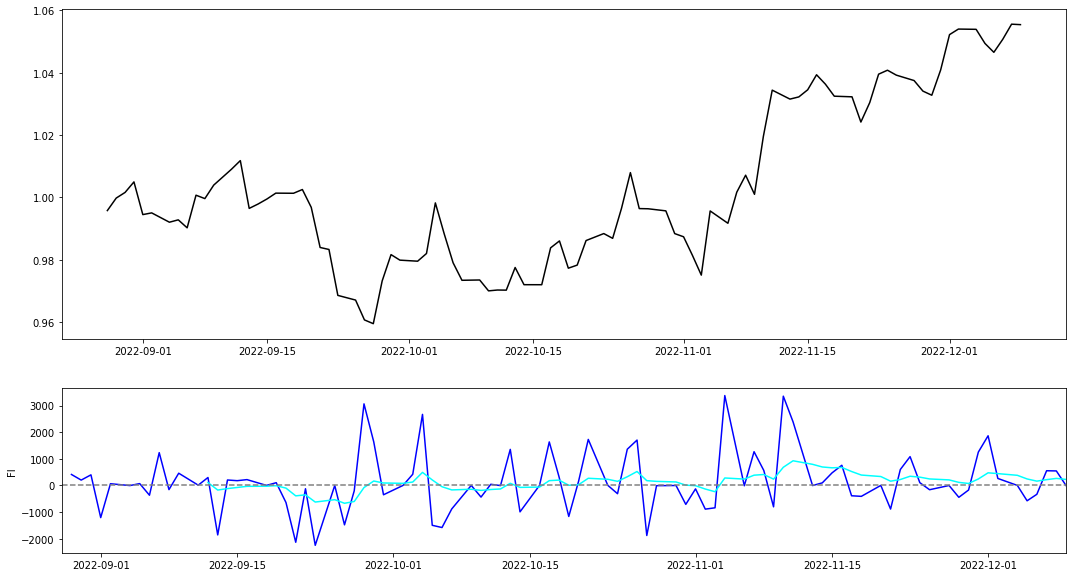

In [4]:
# visualizzazione del FI su un grafico

fig, (ax_price, ax_fi) = plt.subplots(2, figsize=(18, 10), gridspec_kw={'height_ratios': [2, 1]})

ax_price.plot(candles.index, candles['close'], color='black')
plt.autoscale(True, axis='x', tight=True)

ax_fi.plot(candles.index, candles['fi'], color='blue')
ax_fi.plot(candles.index, candles['fi_ema'], color='cyan')
ax_fi.hlines(0, xmin=candles.index[0], xmax=candles.index[-1], color='gray', linestyle='--')
ax_fi.set_ylabel('FI')

plt.show()

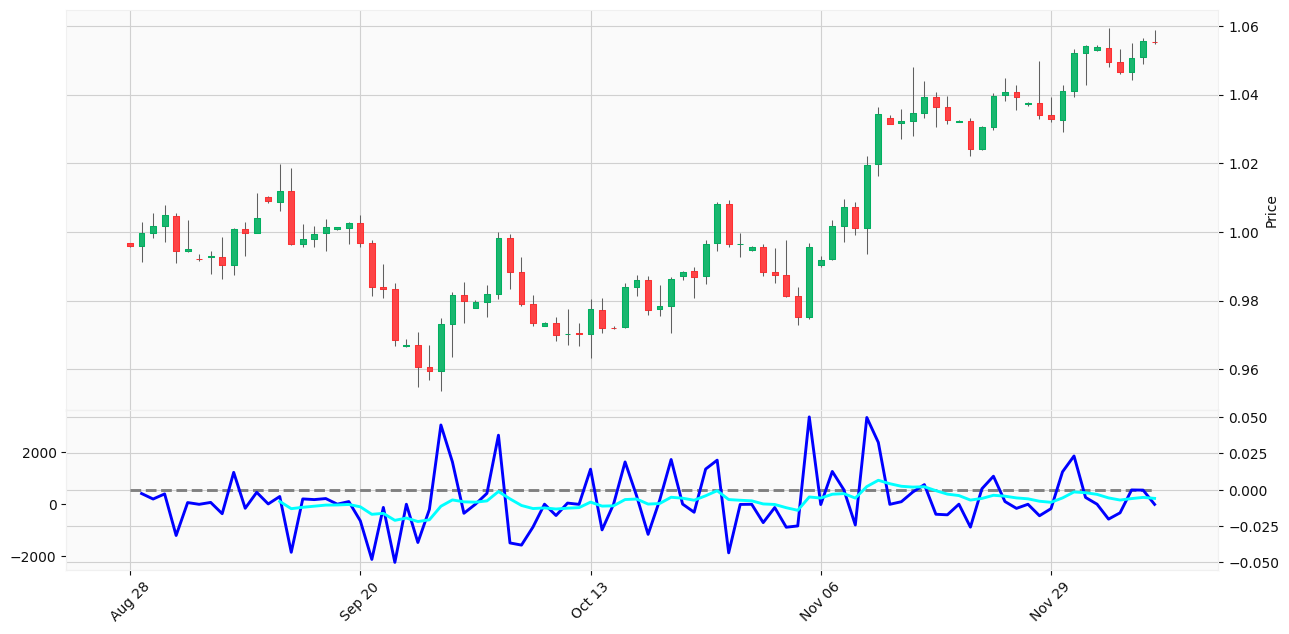

In [5]:
n_candele = len(candles)

fi_plot = mpf.make_addplot(candles['fi'], color='blue', panel=1)
fi_ema_plot = mpf.make_addplot(candles['fi_ema'], color='cyan', panel=1)
fi_middle_plot = mpf.make_addplot([0] * n_candele, color='gray', linestyle='--', panel=1)
mpf.plot(candles, addplot=[fi_middle_plot, fi_plot, fi_ema_plot], type='candle', style='yahoo', figsize=(16, 8))